##캐글러를 대상으로 한 설문조사

- 설문기간 : 2017년 8월 7일부터 8월 25일까지
- 평균 응답 시간은 16.4 분
- 171 개 국가 및 지역에서 16,716 명의 응답자
- 특정 국가 또는 지역에서 응답자가 50 명 미만인 경우 익명을 위해 그룹을 '기타'그룹으로 그룹화
- 설문 조사 시스템에 신고 된 응답자를 스팸으로 분류하거나 취업 상태에 관한 질문에 답변하지 않은 응답자는 제외(이 질문은 첫 번째 필수 질문이기에 응답하지 않으면 응답자가 다섯 번째 질문 이후 진행되지 않음)
- 대부분의 응답자는 이메일 목록, 토론 포럼 및 소셜 미디어 Kaggle 채널을 통해 설문을 알게 됨
- 급여데이터는 일부 통화에 대해서만 받고 해당 되는 통화에 기준하여 작성하도록 함
미국 달러로 급여를 계산할 수 있도록 USD로 환산 한 csv를 제공
- 질문은 선택적
- 모든 질문이 모든 응답자에게 보여지는 것은 아님
- 취업을 한 사람과 학생을 나누어 다른 질문을 함
- 응답자의 신원을 보호하기 위해 주관식과 객관식 파일로 분리
- 객관식과 자유 형식 응답을 맞추기 위한 키를 제공하지 않음
- 주관식 응답은 같은 행에 나타나는 응답이 반드시 동일한 설문 조사자가 제공하지 않도록 열 단위로 무작위 지정


## 데이터 파일

5 개의 데이터 파일을 제공

- schema.csv : 설문 스키마가있는 CSV 파일입니다. 이 스키마에는 multipleChoiceResponses.csv 및 freeformResponses.csv의 각 열 이름에 해당하는 질문이 포함되어 있습니다.
- multipleChoiceResponses.csv : 객관식 및 순위 질문에 대한 응답자의 답변, 각 행이 한 응답자의 응답
- freeformResponses.csv : Kaggle의 설문 조사 질문에 대한 응답자의 주관식 답변입니다. 임의로 지정되어 각 행이 같은 응답자를 나타내지 않음
- conversionRates.csv : R 패키지 "quantmod"에서 2017 년 9 월 14 일에 액세스 한 통화 변환율 (USD)
- RespondentTypeREADME.txt : schema.csv 파일의 "Asked"열에 응답을 디코딩하는 스키마입니다.

In [3]:
# 노트북 안에서 그래프를 그리기 위해
%matplotlib inline

# import the standard python scientific libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# suppress deprecation and incorrect usage warings / warning 무시
import warnings
warnings.filterwarnings('ignore')



In [5]:
question = pd.read_csv('/content/schema.csv')
question.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Column    290 non-null    object
 1   Question  290 non-null    object
 2   Asked     290 non-null    object
dtypes: object(3)
memory usage: 6.9+ KB


In [6]:
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [7]:
question.tail()

,Column,Question,Asked
285,JobFactorRemote,How are you assessing potential job opportunit...,Learners
286,JobFactorIndustry,How are you assessing potential job opportunit...,Learners
287,JobFactorLeaderReputation,How are you assessing potential job opportunit...,Learners
288,JobFactorDiversity,How are you assessing potential job opportunit...,Learners
289,JobFactorPublishingOpportunity,How are you assessing potential job opportunit...,Learners


In [12]:
# 객관식 문제에 대한 응답을 가져옴
mcq = pd.read_csv('/content/multipleChoiceResponses.csv', encoding='ISO-8859-1', low_memory=False)
mcq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16716 entries, 0 to 16715
Columns: 228 entries, GenderSelect to JobFactorPublishingOpportunity
dtypes: float64(13), object(215)
memory usage: 29.1+ MB


In [14]:
mcq.shape

(16716, 228)

In [16]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [17]:
mcq.head(10)

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,...,WorkChallengeFrequencyITCoordination,WorkChallengeFrequencyHiringFunds,WorkChallengeFrequencyPrivacy,WorkChallengeFrequencyScaling,WorkChallengeFrequencyEnvironments,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,WorkChallengeFrequencyOtherSelect,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,WorkDatasets,WorkDatasetsChallenge,WorkDataStorage,WorkDataSharing,WorkDataSourcing,WorkCodeSharing,RemoteWork,CompensationAmount,CompensationCurrency,SalaryChange,JobSatisfaction,JobSearchResource,JobHuntTime,JobFactorLearning,JobFactorSalary,JobFactorOffice,JobFactorLanguages,JobFactorCommute,JobFactorManagement,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,Employed by a company that doesn't perform adv...,SAS Base,Random Forests,F#,Dataset aggregator/platform (i.e. Socrata/Kagg...,"College/University,Conferences,Podcasts,Trade ...",NaN,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,NaN,NaN,Somewhat useful,NaN,NaN,"Becoming a Data Scientist Podcast,Data Machina...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Often,Most of the time,NaN,NaN,NaN,NaN,26-50% of projects,Do not know,Standalone Team,NaN,NaN,Document-oriented (e.g. MongoDB/Elasticsearch)...,"Company Developed Platform,I don't typically s...",NaN,"Mercurial,Subversion,Other",Always,NaN,NaN,I am not currently employed,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,Random Forests,Python,Dataset aggregator/platform (i.e. Socrata/Kagg...,Kaggle,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Becoming a Data Scientist Podcast,Siraj Raval ...",1-2 years,NaN,Nice to have,Unnecessary,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amazon Web services,Deep learning,R,Dataset aggregator/platform (i.e. Socrata/Kagg...,"Arxiv,College/University,Kaggle,Online courses...",Very useful,NaN,Somewhat useful,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,"FastML Blog,No Free Hunch Blog,Talking Machine...",1-2 years,Necessary,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Asking friends, family members, or former coll...",1-2,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Impor

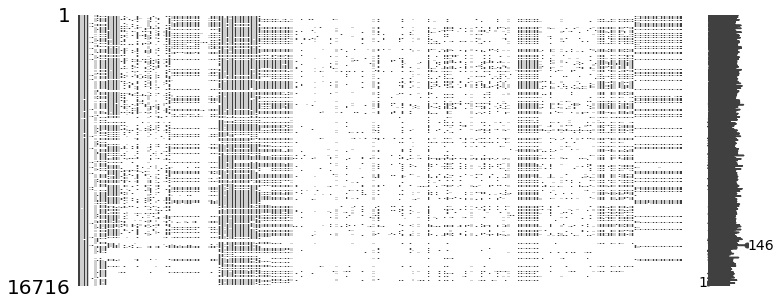

In [19]:
# missingno 는 NaN 데이터들에 대해 시각화를 해준다.
# NaN 데이터의 컬럼이 많아 아래 그래프 만으로는 내용을 파악하기 힘들다.

import missingno as msno

msno.matrix(mcq, figsize=(12,5))

## 설문 통계

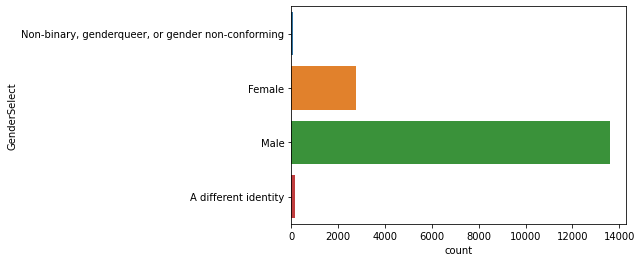

In [21]:
# 성별
sns.countplot(y='GenderSelect', data=mcq)
# mcq 데이터프레임에서 GenderSelect의 count 별 그래프를 나타냄
# 여성보다 남성의 설문 응답의 수가 더 많음

In [23]:
# 국가별 응답수
con_df = pd.DataFrame(mcq['Country'].value_counts())
con_df
# mcq의 country 컬럼의 value들의 counts를 세어 데이터프레임을 만들어준다,

,Country
United States,4197
India,2704
Other,1023
Russia,578
United Kingdom,535
People 's Republic of China,471
Brazil,465
Germany,460
France,442
Canada,440


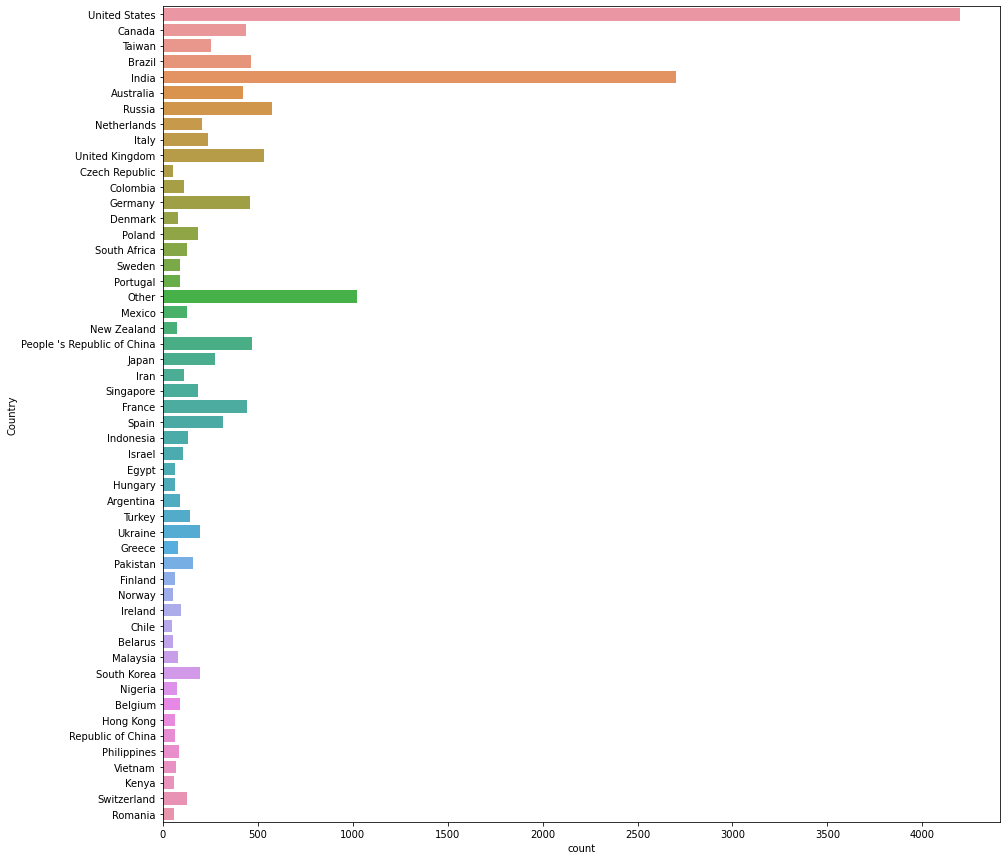

In [57]:
plt.figure(figsize=(15,15))
sns.countplot(y='Country', data=mcq)

In [24]:
con_df['국가'] = con_df.index

con_df
# 국가 컬럼을 만들어줌

,Country,국가
United States,4197,United States
India,2704,India
Other,1023,Other
Russia,578,Russia
United Kingdom,535,United Kingdom
People 's Republic of China,471,People 's Republic of China
Brazil,465,Brazil
Germany,460,Germany
France,442,France
Canada,440,Canada


In [25]:
con_df.columns = ['응답 수', '국가']
con_df.head()
# 컬럼 명을 응답 수와 국가로 변경해줌

,응답 수,국가
United States,4197,United States
India,2704,India
Other,1023,Other
Russia,578,Russia
United Kingdom,535,United Kingdom


In [27]:
# index 컬럼을 삭제하고 순위를 알기 위해서 reset_index()를 해준다.
# 우리나라는 18위이고 전체 52개국 중에서 20위까지만 확인한다.
con_df = con_df.reset_index().drop('index', axis=1)

con_df.head(20)

,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [33]:
# Age 컬럼에 대한 정보를 본다. 
mcq['Age'].describe()

# 평균 연령, 최대, 최소 연령

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

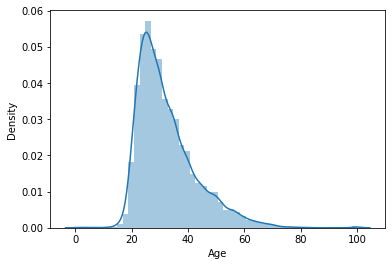

In [34]:
sns.distplot(mcq[mcq['Age'] > 0]['Age'])

응답자의 대부분이 어리고, 20대부터 급격히 늘어나며 30대가 가장 많다.</br>
평균 나이는 32세이다.

##학력

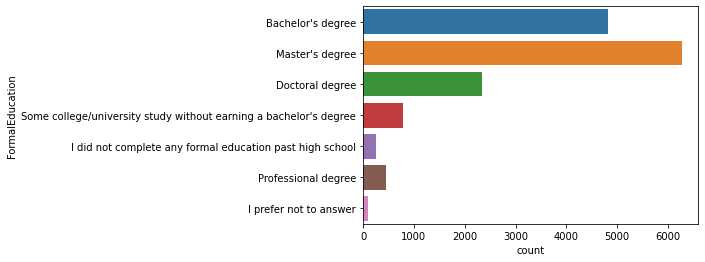

In [39]:
sns.countplot(y='FormalEducation', data=mcq)

응답자 중 master's degree(석사학위)가 가장 많았고 bachelor's degree(학사학위)가 그 뒤를 잇고 Doctoral degree(박사학위)가 세번째를 이었다.

##전공

In [41]:
pd.DataFrame(
    mcq['MajorSelect'].value_counts())


,MajorSelect
Computer Science,4397
Mathematics or statistics,2220
Engineering (non-computer focused),1339
Electrical Engineering,1303
Other,848
Physics,830
"Information technology, networking, or system administration",693
A social science,531
Biology,274
Management information systems,237


## 전공

In [52]:
# .value_counts()를 이용하면 그룹화 된 데이터의 count 값을 보여준다.
# namalize= True 옵션을 사용하면, 해당 데이터에서 어느정도의 비율을 차지하는지 알 수 있다.

mcq_major_count = pd.DataFrame(
    mcq['MajorSelect'].value_counts()
)

mcq_major_percent = pd.DataFrame(
    mcq['MajorSelect'].value_counts(normalize=True)
)

mcq_major_df = mcq_major_count.merge(
    mcq_major_percent, left_index= True, right_index= True
)
mcq_major_df.columns = ['응답 수', '비율']


In [53]:
mcq_major_df

,응답 수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


컴퓨터 과학 전공자들이 33%를 차지할 정도로 많고 수리통계, 공학. 전기 공학자들이 뒤를 이었다.

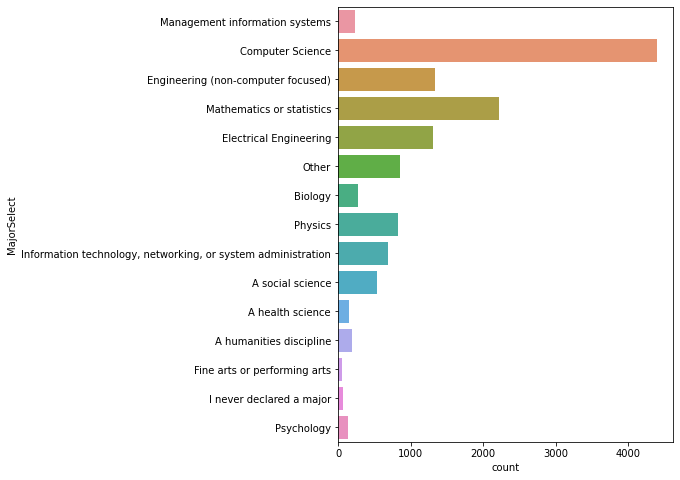

In [54]:
plt.figure(figsize=(6, 8))
sns.countplot(y='MajorSelect', data=mcq)

## 취업여부

In [60]:
mcq_es_count = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts()
)
mcq_es_percent = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts(normalize=True)
)
mcq_es_df = mcq_es_count.merge(
    mcq_es_percent, left_index=True, right_index=True
)
mcq_es_df.columns = ['응답 수', '비율']

In [61]:
mcq_es_df

,응답 수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


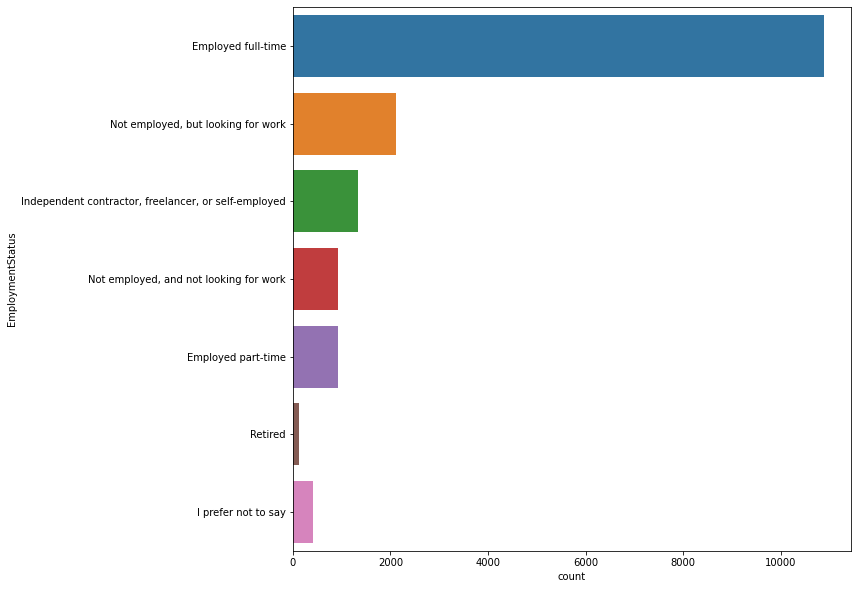

In [62]:
plt.figure(figsize=(10, 10))
sns.countplot(y='EmploymentStatus', data=mcq)

Employed full-time가 65% 를 차지할 정도로 가장 많았고 Not employed, but looking for work가 그 뒤로 가장 많았다.

## 프로그래밍 경험

'Tenure'항목은 데이터사이언스 분야에서 코딩 경험이 얼마나 되는지에 대한 질문이다.</br>



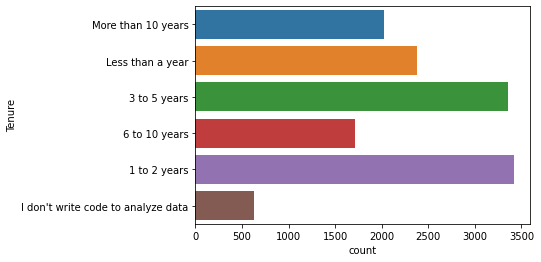

In [63]:
sns.countplot(y='Tenure', data=mcq)

특히 1 ~ 2년의 경험을 가진 사람들이 많았고 그 뒤로 3 ~ 5년의 경험을 가진 사람들이 많았다.

## 한국

The number of interviewees in Korea is 194


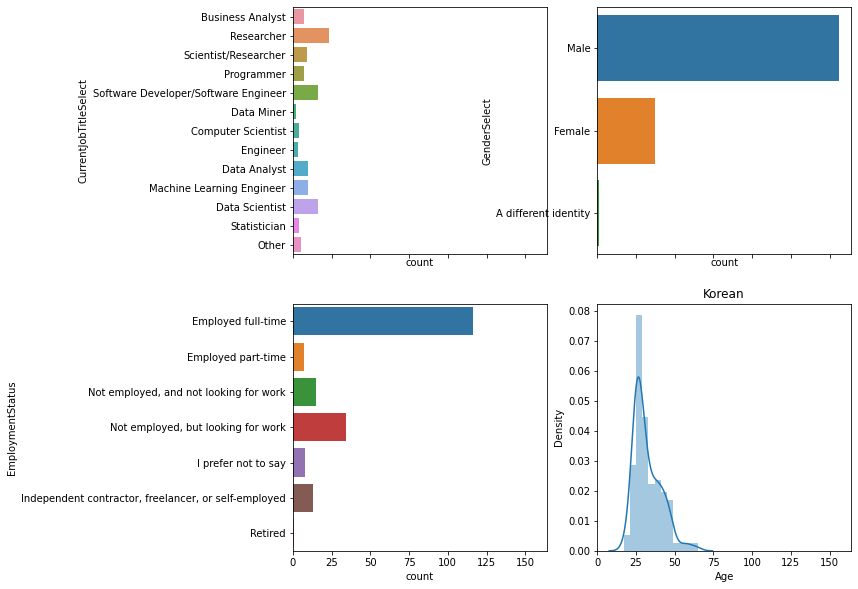

In [107]:
korea = mcq.loc[mcq['Country'] == 'South Korea']

print('The number of interviewees in Korea is', str(korea.shape[0]))


f,axes = plt.subplots(2, 2, figsize=(10,10), sharex=True)
sns.countplot(y='GenderSelect', data=korea, ax=axes[0,1])
sns.countplot(y='EmploymentStatus', data=korea, ax=axes[1,0])
sns.countplot(y='CurrentJobTitleSelect', data=korea, ax=axes[0,0])
sns.distplot(korea['Age'].dropna(), ax=axes[1,1])
plt.title('Korean')
plt.show()

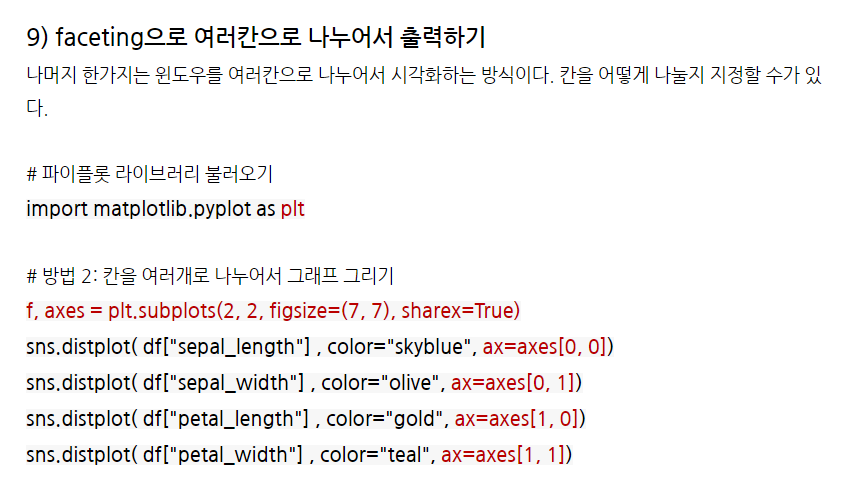

Text(0.5, 1.0, 'Korean male')

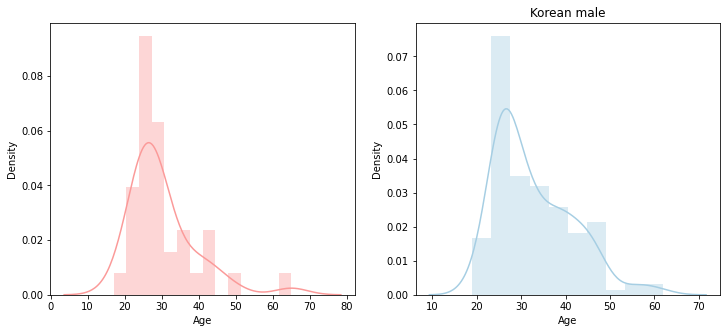

In [104]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12, 5)
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(),
             norm_hist=False, color= sns.color_palette('Paired')[4], ax= ax1)
plt.title('Korean Female')

sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(),
             norm_hist=False, color= sns.color_palette('Paired')[0], ax= ax2)
plt.title('Korean male')

# korea 데이터 프레임에서 age 컬럼을 뽑고 GenderSelect가 male or female인 행들만 추출한다.


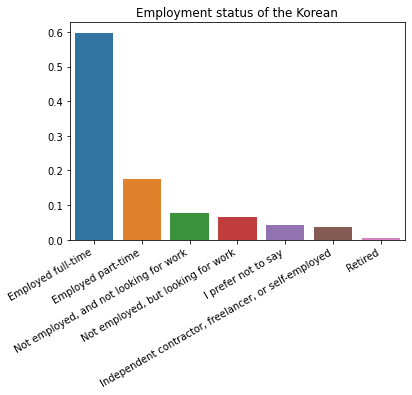

In [109]:
sns.barplot(x=korea['EmploymentStatus'].unique(), y=korea['EmploymentStatus'].value_counts()/len(korea))
plt.xticks(rotation=30, ha='right')
plt.title('Employment status of the Korean')
plt.ylabel('')
plt.show()

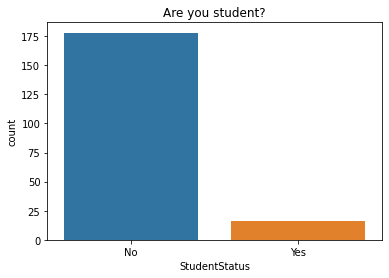

In [112]:
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot(x='StudentStatus', data=korea)
plt.title('Are you student?')
plt.show()


In [114]:
full_time = mcq.loc[mcq['EmploymentStatus'] == 'Employed full-time']
print(full_time.shape)

look_for_job = mcq.loc[mcq['EmploymentStatus'] == 'Not employed, but looking for work']
print(look_for_job.shape)

(10897, 228)
(2110, 228)
